In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

<br>
<br>

## 1. 데이터 불러오기
<hr>

In [2]:
df = pd.read_excel('여행실태조사.xlsx', encoding='utf-8') 
df

,ID,Q,QQ,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,MON_EXP_5,MON_EXP_6,S5,...,BAGE,BJOB,BEDU,BFAM,BINC1,BARA,BINC2,BMAR,BMON,WT_DOM
0,11010550341_1000000,1,0,1,2,2,2,2,2,NaN,...,3,1,4,1,3,11,3,1,1,14517.015410
1,11010550341_1000013,1,0,1,2,2,2,2,2,NaN,...,6,13,4,1,4,11,4,3,1,11294.917024
2,1101057010A_1000056,1,0,1,2,2,2,2,2,NaN,...,2,1,4,1,3,11,3,1,1,25548.921716
3,1101057010A_1000058,0,0,2,2,2,2,2,2,2.0,...,4,1,4,1,3,11,3,1,1,32049.934024
4,11010570431_1030412,2,0,1,2,2,2,2,1,NaN,...,3,1,4,1,4,11,4,1,2,14019.811416
5,11010630251_1058743,1,0,2,2,2,2,1,2,NaN,...,7,1,2,1,2,11,2,3,3,13867.628359
6,11010630251_1058771,1,0,1,2,2,2,2,2,NaN,...,3,1,4,1,3,11,3,1,3,24559.983201
7,11010680101_1097605,1,0,2,2,2,2,1,2,NaN,...,3,1,4,1,3,11,3,1,4,15880.552259
8,11010680101_1097606,1,0,1,2,2,2,2,2,NaN,...,6,1,3,1,2,11,2,3,4,15841.536851
9,11010710281_1128507,1,0,2,2,2,2,1,2,NaN,...,6,1,3,1,2,11,2,3,5,11302.391185


In [3]:
# 가구원 수 1 == 1인 가구에 대한 자료
# BFAM == 동거가구원수

df['BFAM'].head()

0    1
1    1
2    1
3    1
4    1
Name: BFAM, dtype: int64

In [4]:
x_df = df.loc[:, ('BSEX','BAGE', 'BINC2','A2_1','A2_2','A2_3','A3_1','A3_2','A3_3','A3_4','A3_5','A3_6','A3_7','A3_8','A3_9','A3_10','A3_11','A3_12','A3_13','A3_14','A3_15','A3_16','A3_17','A3_18','A3_19','A3_20','A3_21','A5_1','A5_2','A5_3','A6_1','A6_2','A6_3','A6_4','A6_5','A6_6','A6_7','A6_8','A6_9','A6_10','A6_11','A6_12','A6_13','A6_14','NA10','A7B_1','A7B_2','A7B_3','A7B_4','A7B_5','A7B_6','A7B_7')]
x_df

,BSEX,BAGE,BINC2,A2_1,A2_2,A2_3,A3_1,A3_2,A3_3,A3_4,...,A6_13,A6_14,NA10,A7B_1,A7B_2,A7B_3,A7B_4,A7B_5,A7B_6,A7B_7
0,1,3,3,1.0,11.0,2.0,1.0,2.0,NaN,NaN,...,NaN,NaN,240000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6,4,2.0,5.0,14.0,1.0,2.0,3.0,NaN,...,NaN,NaN,492500.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,3,12.0,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,100000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,1,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,3,4,4.0,5.0,11.0,1.0,NaN,3.0,NaN,...,13.0,NaN,92000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,1,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2,3,3,1.0,3.0,13.0,1.0,2.0,3.0,NaN,...,NaN,NaN,42660.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,6,2,9.0,2.0,3.0,1.0,2.0,NaN,NaN,...,NaN,NaN,30000.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN
9,1,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['NA10'].isnull().sum()

4066

<br>
<br>

## 2. 코드 정리하기
<hr>

In [6]:
x_df.rename(columns={'BSEX': 'Sex', 'BAGE': 'Age', 'BINC2':'Income', 'NA10':'1인지출비용'},inplace=True)
x_df

,Sex,Age,Income,A2_1,A2_2,A2_3,A3_1,A3_2,A3_3,A3_4,...,A6_13,A6_14,1인지출비용,A7B_1,A7B_2,A7B_3,A7B_4,A7B_5,A7B_6,A7B_7
0,1,3,3,1.0,11.0,2.0,1.0,2.0,NaN,NaN,...,NaN,NaN,240000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6,4,2.0,5.0,14.0,1.0,2.0,3.0,NaN,...,NaN,NaN,492500.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,3,12.0,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,100000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,1,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,3,4,4.0,5.0,11.0,1.0,NaN,3.0,NaN,...,13.0,NaN,92000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,1,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2,3,3,1.0,3.0,13.0,1.0,2.0,3.0,NaN,...,NaN,NaN,42660.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,6,2,9.0,2.0,3.0,1.0,2.0,NaN,NaN,...,NaN,NaN,30000.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN
9,1,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br>
<br>

## 3. 데이터 전처리

<br>
<br>

### 1) Type
<hr>

In [7]:
# 여행유형 열만 뽑기

type_data = x_df[['A3_1', 'A3_6', 'A3_7', 'A3_2', 'A3_8', 'A3_3', 'A3_5', 'A3_11', 'A3_12', 'A3_4', 'A3_9', 'A3_10', 'A3_13', 'A3_15', 'A3_16']]
type_data.head(3)

,A3_1,A3_6,A3_7,A3_2,A3_8,A3_3,A3_5,A3_11,A3_12,A3_4,A3_9,A3_10,A3_13,A3_15,A3_16
0,1.0,NaN,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,6.0,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 결측치는 0으로 채우기

type_data[:] = type_data[:].fillna(0)
type_data.head(3)

,A3_1,A3_6,A3_7,A3_2,A3_8,A3_3,A3_5,A3_11,A3_12,A3_4,A3_9,A3_10,A3_13,A3_15,A3_16
0,1.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,6.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# 답을 1로 바꾸기

cols = ['A3_1', 'A3_6', 'A3_7', 'A3_2', 'A3_8', 'A3_3', 'A3_5', 'A3_11', 'A3_12', 'A3_4', 'A3_9', 'A3_10', 'A3_13', 'A3_15', 'A3_16']
num = range(1, 17)
for col in cols:
    type_data[col] =  type_data[col].replace(num, 1)
type_data.head(3)

,A3_1,A3_6,A3_7,A3_2,A3_8,A3_3,A3_5,A3_11,A3_12,A3_4,A3_9,A3_10,A3_13,A3_15,A3_16
0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 4개 카테고리로 합산
type_data['relax'] = type_data['A3_1'] + type_data['A3_6'] + type_data['A3_7'] 
type_data['shop'] = type_data['A3_2'] + type_data['A3_8'] 
type_data['act'] = type_data['A3_3'] + type_data['A3_5'] + type_data['A3_11']  + type_data['A3_12'] 
type_data['watch'] = type_data['A3_4'] + type_data['A3_9'] + type_data['A3_10'] + type_data['A3_13']  + type_data['A3_15'] + type_data['A3_16'] 
type_data.head(3)

,A3_1,A3_6,A3_7,A3_2,A3_8,A3_3,A3_5,A3_11,A3_12,A3_4,A3_9,A3_10,A3_13,A3_15,A3_16,relax,shop,act,watch
0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [11]:
sum_data = type_data[['relax','shop', 'act', 'watch']]
len(sum_data) #6890

6890

In [12]:
# 4가지 중 최대 값 뽑아내서 리스트(together)에 저장. 
# 동일한 값이 있을 경우 제일 먼저거 선택. 결측치는 notsure

columns = list(sum_data.columns)

together =[]
for i, row in sum_data.iterrows():
    max_in_row = row.max()
    for j, item in enumerate(row):
        if max_in_row == 0:
            together.append("notsure")
            break
        elif item == max_in_row:
#             print(columns[j])
            together.append(columns[j])
            break
len(together) #6890

6890

In [13]:
df_new = pd.DataFrame(data=together, index=None, columns=['Type'])
df_new["Type"].value_counts()

notsure    4128
relax      2410
shop        216
watch        79
act          57
Name: Type, dtype: int64

In [14]:
x_df['Type'] = df_new
x_df.head()

,Sex,Age,Income,A2_1,A2_2,A2_3,A3_1,A3_2,A3_3,A3_4,...,A6_14,1인지출비용,A7B_1,A7B_2,A7B_3,A7B_4,A7B_5,A7B_6,A7B_7,Type
0,1,3,3,1.0,11.0,2.0,1.0,2.0,NaN,NaN,...,NaN,240000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,relax
1,1,6,4,2.0,5.0,14.0,1.0,2.0,3.0,NaN,...,NaN,492500.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,relax
2,2,2,3,12.0,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,100000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,relax
3,1,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,notsure
4,2,3,4,4.0,5.0,11.0,1.0,NaN,3.0,NaN,...,NaN,92000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,relax


In [15]:
del x_df['A3_1']
del x_df['A3_2']
del x_df['A3_3']
del x_df['A3_4']
del x_df['A3_5']
del x_df['A3_6']
del x_df['A3_7']
del x_df['A3_8']
del x_df['A3_9']
del x_df['A3_10']
del x_df['A3_11']
del x_df['A3_12']
del x_df['A3_13']
del x_df['A3_14']
del x_df['A3_15']
del x_df['A3_16']
del x_df['A3_17']
del x_df['A3_18']
del x_df['A3_19']
del x_df['A3_20']
del x_df['A3_21']

x_df.head()


,Sex,Age,Income,A2_1,A2_2,A2_3,A5_1,A5_2,A5_3,A6_1,...,A6_14,1인지출비용,A7B_1,A7B_2,A7B_3,A7B_4,A7B_5,A7B_6,A7B_7,Type
0,1,3,3,1.0,11.0,2.0,1.0,NaN,NaN,1.0,...,NaN,240000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,relax
1,1,6,4,2.0,5.0,14.0,3.0,8.0,NaN,NaN,...,NaN,492500.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,relax
2,2,2,3,12.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,100000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,relax
3,1,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,notsure
4,2,3,4,4.0,5.0,11.0,1.0,NaN,NaN,NaN,...,NaN,92000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,relax


<br>
<br>

### 2) Sleep
<hr>

In [16]:
sleep_data = x_df[['A6_1','A6_2','A6_3','A6_4','A6_5','A6_6','A6_7','A6_8','A6_9','A6_10','A6_11','A6_12','A6_13','A6_14']]
sleep_data.head(3)

,A6_1,A6_2,A6_3,A6_4,A6_5,A6_6,A6_7,A6_8,A6_9,A6_10,A6_11,A6_12,A6_13,A6_14
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# 결측치는 0으로 채우기

sleep_data[:] = sleep_data[:].fillna(0)
sleep_data.head(3)

,A6_1,A6_2,A6_3,A6_4,A6_5,A6_6,A6_7,A6_8,A6_9,A6_10,A6_11,A6_12,A6_13,A6_14
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# 답을 1로 바꾸기

cols = ['A6_1','A6_2','A6_3','A6_4','A6_5','A6_6','A6_7','A6_8','A6_9','A6_10','A6_11','A6_12','A6_13','A6_14']
num = range(1, 14)
for col in cols:
    sleep_data[col] =  sleep_data[col].replace(num, 1)
sleep_data.head(3)

,A6_1,A6_2,A6_3,A6_4,A6_5,A6_6,A6_7,A6_8,A6_9,A6_10,A6_11,A6_12,A6_13,A6_14
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
sleep_data['A6_13'].isnull().sum()

0

In [20]:
sleep_data

,A6_1,A6_2,A6_3,A6_4,A6_5,A6_6,A6_7,A6_8,A6_9,A6_10,A6_11,A6_12,A6_13,A6_14
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# 4개 카테고리로 합산
sleep_data['camp'] = sleep_data['A6_6'] + sleep_data['A6_11']
sleep_data['acc'] = sleep_data['A6_1'] + sleep_data['A6_2'] + sleep_data['A6_3'] + sleep_data['A6_4'] + sleep_data['A6_5'] + sleep_data['A6_7'] + sleep_data['A6_8'] + sleep_data['A6_9'] + sleep_data['A6_10'] 
sleep_data['odt'] = sleep_data['A6_13'] + sleep_data['A6_12'] + sleep_data['A6_14']  

sleep_data.head(3)

,A6_1,A6_2,A6_3,A6_4,A6_5,A6_6,A6_7,A6_8,A6_9,A6_10,A6_11,A6_12,A6_13,A6_14,camp,acc,odt
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
sum_data1 = sleep_data[['camp','acc', 'odt']]
sum_data1

,camp,acc,odt
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,1.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [23]:
# 4가지 중 최대 값 뽑아내서 리스트(together)에 저장. 
# 동일한 값이 있을 경우 제일 먼저거 선택. 결측치는 notsure

columns1 = list(sum_data1.columns)

together1 =[]
for i, row in sum_data1.iterrows():
    max_in_row = row.max()
    for j, item in enumerate(row):
        if max_in_row == 0:
            together1.append("notsure")
            break
        elif item == max_in_row:
#             print(columns[j])
            together1.append(columns1[j])
            break
len(together1) #6890

6890

In [24]:
df_new1 = pd.DataFrame(data=together1, index=None, columns=['Sleep'])
df_new1["Sleep"].value_counts()

notsure    5607
acc         891
odt         349
camp         43
Name: Sleep, dtype: int64

In [25]:
x_df['Sleep'] = df_new1
x_df.head()

,Sex,Age,Income,A2_1,A2_2,A2_3,A5_1,A5_2,A5_3,A6_1,...,1인지출비용,A7B_1,A7B_2,A7B_3,A7B_4,A7B_5,A7B_6,A7B_7,Type,Sleep
0,1,3,3,1.0,11.0,2.0,1.0,NaN,NaN,1.0,...,240000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,relax,acc
1,1,6,4,2.0,5.0,14.0,3.0,8.0,NaN,NaN,...,492500.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,relax,acc
2,2,2,3,12.0,NaN,NaN,1.0,NaN,NaN,NaN,...,100000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,relax,notsure
3,1,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,notsure,notsure
4,2,3,4,4.0,5.0,11.0,1.0,NaN,NaN,NaN,...,92000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,relax,odt


In [26]:
del x_df['A6_1']
del x_df['A6_2']
del x_df['A6_3']
del x_df['A6_4']
del x_df['A6_5']
del x_df['A6_6']
del x_df['A6_7']
del x_df['A6_8']
del x_df['A6_9']
del x_df['A6_10']
del x_df['A6_11']
del x_df['A6_12']
del x_df['A6_13']
del x_df['A6_14']


x_df.head()

,Sex,Age,Income,A2_1,A2_2,A2_3,A5_1,A5_2,A5_3,1인지출비용,A7B_1,A7B_2,A7B_3,A7B_4,A7B_5,A7B_6,A7B_7,Type,Sleep
0,1,3,3,1.0,11.0,2.0,1.0,NaN,NaN,240000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,relax,acc
1,1,6,4,2.0,5.0,14.0,3.0,8.0,NaN,492500.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,relax,acc
2,2,2,3,12.0,NaN,NaN,1.0,NaN,NaN,100000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,relax,notsure
3,1,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,notsure,notsure
4,2,3,4,4.0,5.0,11.0,1.0,NaN,NaN,92000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,relax,odt


<br>
<br>

### 3) Reason
<hr>

In [27]:
# 선호유형 열만 뽑기
fav_data = x_df[['A2_1', 'A2_2', 'A2_3']]
fav_data.head()    

,A2_1,A2_2,A2_3
0,1.0,11.0,2.0
1,2.0,5.0,14.0
2,12.0,NaN,NaN
3,NaN,NaN,NaN
4,4.0,5.0,11.0


In [28]:
# 결측치는 0으로 채우기
fav_data[:] = fav_data[:].fillna(0)
fav_data.head(3)

,A2_1,A2_2,A2_3
0,1.0,11.0,2.0
1,2.0,5.0,14.0
2,12.0,0.0,0.0


In [29]:
# 1: 지명도 2:볼거리 4:거리 5:여행가능시간 0: 응답없음

def first(x):
    nums = [1, 2, 4, 5]
    if x in nums:
        return x
    else:
        return 0
        
fav_data['Reason1'] = fav_data['A2_1'].apply(first)

def second(x):
    nums = [1, 2, 4, 5]
    if x in nums:
        return x
    else:
        return 0
fav_data['Reason2'] = fav_data['A2_2'].apply(second)

def third(x):
    nums = [1, 2, 4, 5]
    if x in nums:
        return x
    else:
        return 0
fav_data['Reason3'] = fav_data['A2_3'].apply(third)

fav_data.head()

,A2_1,A2_2,A2_3,Reason1,Reason2,Reason3
0,1.0,11.0,2.0,1.0,0.0,2.0
1,2.0,5.0,14.0,2.0,5.0,0.0
2,12.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,5.0,11.0,4.0,5.0,0.0


In [30]:
sum_fav = fav_data[['Reason1','Reason2','Reason3']]
sum_fav.head()

,Reason1,Reason2,Reason3
0,1.0,0.0,2.0
1,2.0,5.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,4.0,5.0,0.0


In [31]:
# 1,2,3 순위 뽑기, 아무값도 없으면 0

columns = list(sum_fav.columns)

together =[]
for i, row in sum_fav.iterrows():
    for j, item in enumerate(row):
        if item != 0:
            together.append(item)
            break
        elif j == 2 and item == 0:
            together.append(0)
            break

df_new = pd.DataFrame(data=together, index=None, columns=['Reason'])
df_new["Reason"].value_counts()


0.0    4393
2.0     846
1.0     719
4.0     469
5.0     463
Name: Reason, dtype: int64

In [32]:
df_new.head(3) # 1: 지명도 2:볼거리 4:거리 5:여행가능시간 0: 응답없음

,Reason
0,1.0
1,2.0
2,0.0


In [33]:
del x_df['A2_1']
del x_df['A2_2']
del x_df['A2_3']

x_df['Reason'] = df_new
x_df.head()

,Sex,Age,Income,A5_1,A5_2,A5_3,1인지출비용,A7B_1,A7B_2,A7B_3,A7B_4,A7B_5,A7B_6,A7B_7,Type,Sleep,Reason
0,1,3,3,1.0,NaN,NaN,240000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,relax,acc,1.0
1,1,6,4,3.0,8.0,NaN,492500.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,relax,acc,2.0
2,2,2,3,1.0,NaN,NaN,100000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,relax,notsure,0.0
3,1,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,notsure,notsure,0.0
4,2,3,4,1.0,NaN,NaN,92000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,relax,odt,4.0


<br>
<br>

### 4) Traffic
<hr>

In [34]:
tra_data = x_df[['A5_1', 'A5_2', 'A5_3']]
tra_data.head(3)

,A5_1,A5_2,A5_3
0,1.0,NaN,NaN
1,3.0,8.0,NaN
2,1.0,NaN,NaN


In [35]:
# 결측치는 0으로 채우기
tra_data[:] = tra_data[:].fillna(0)
tra_data.head(3)


,A5_1,A5_2,A5_3
0,1.0,0.0,0.0
1,3.0,8.0,0.0
2,1.0,0.0,0.0


In [36]:
cols = ['A5_1', 'A5_2', 'A5_3']
car = [1, 8, 10]
pub = [2, 3, 4, 5, 6, 7]
etc = [9, 11]

for col in cols:
    tra_data[col] =  tra_data[col].replace(car, 1)
    tra_data[col] =  tra_data[col].replace(pub,2)
    tra_data[col] =  tra_data[col].replace(etc, 3)
tra_data.head(3)

,A5_1,A5_2,A5_3
0,1.0,0.0,0.0
1,2.0,1.0,0.0
2,1.0,0.0,0.0


In [37]:
# 1: 자동차 2:대중교통 3:기타 0: 응답없음

def first(x):
    nums = [1, 2, 3]
    if x in nums:
        return x
    else:
        return 0
        
tra_data['Traffic1'] = tra_data['A5_1'].apply(first)

def second(x):
    nums = [1, 2, 3]
    if x in nums:
        return x
    else:
        return 0
tra_data['Traffic2'] = tra_data['A5_2'].apply(second)

def third(x):
    nums = [1, 2, 3]
    if x in nums:
        return x
    else:
        return 0
tra_data['Traffic3'] = tra_data['A5_3'].apply(third)

tra_data.head()

,A5_1,A5_2,A5_3,Traffic1,Traffic2,Traffic3
0,1.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1.0,0.0,2.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0


In [38]:
sum_fav = tra_data[['Traffic1','Traffic2','Traffic3']]
sum_fav.head()

,Traffic1,Traffic2,Traffic3
0,1.0,0.0,0.0
1,2.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [39]:
# 1,2,3 순위 뽑기, 아무값도 없으면 0

columns = list(sum_fav.columns)

together =[]
for i, row in sum_fav.iterrows():
    for j, item in enumerate(row):
        if item != 0:
            together.append(item)
            break
        elif j == 2 and item == 0:
            together.append(0)
            break

df_traf = pd.DataFrame(data=together, index=None, columns=['Traffic'])
df_traf["Traffic"].value_counts()

0.0    4066
1.0    2155
2.0     656
3.0      13
Name: Traffic, dtype: int64

In [40]:
df_traf.head(10) # 1: 지명도 2:볼거리 4:거리 5:여행가능시간 0: 응답없음

,Traffic
0,1.0
1,2.0
2,1.0
3,0.0
4,1.0
5,0.0
6,1.0
7,0.0
8,2.0
9,0.0


In [41]:
x_df['Traffic'] = df_traf
x_df.head()

,Sex,Age,Income,A5_1,A5_2,A5_3,1인지출비용,A7B_1,A7B_2,A7B_3,A7B_4,A7B_5,A7B_6,A7B_7,Type,Sleep,Reason,Traffic
0,1,3,3,1.0,NaN,NaN,240000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,relax,acc,1.0,1.0
1,1,6,4,3.0,8.0,NaN,492500.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,relax,acc,2.0,2.0
2,2,2,3,1.0,NaN,NaN,100000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,relax,notsure,0.0,1.0
3,1,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,notsure,notsure,0.0,0.0
4,2,3,4,1.0,NaN,NaN,92000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,relax,odt,4.0,1.0


In [42]:
del x_df['A5_1']
del x_df['A5_2']
del x_df['A5_3']

In [43]:
x_df.head()

,Sex,Age,Income,1인지출비용,A7B_1,A7B_2,A7B_3,A7B_4,A7B_5,A7B_6,A7B_7,Type,Sleep,Reason,Traffic
0,1,3,3,240000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,relax,acc,1.0,1.0
1,1,6,4,492500.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,relax,acc,2.0,2.0
2,2,2,3,100000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,relax,notsure,0.0,1.0
3,1,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,notsure,notsure,0.0,0.0
4,2,3,4,92000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,relax,odt,4.0,1.0


<br>
<br>

### 5) 동반자유형(With)
<hr>

In [44]:
# 동반자유형 열만 뽑기

with_data = x_df[['A7B_1', 'A7B_2', 'A7B_3', 'A7B_4', 'A7B_5', 'A7B_6', 'A7B_7']]
with_data.head(3)

,A7B_1,A7B_2,A7B_3,A7B_4,A7B_5,A7B_6,A7B_7
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [45]:
# 결측치는 0으로 채우기

with_data[:] = with_data[:].fillna(0)
with_data.head(3)

,A7B_1,A7B_2,A7B_3,A7B_4,A7B_5,A7B_6,A7B_7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.0,0.0,0.0,0.0,0.0


In [46]:
# 답을 1로 바꾸기
cols = ['A7B_1', 'A7B_2', 'A7B_3', 'A7B_4', 'A7B_5', 'A7B_6', 'A7B_7']
num = range(1, 17)
for col in cols:
    with_data[col] =  with_data[col].replace(num, 1)
with_data.head(3)

,A7B_1,A7B_2,A7B_3,A7B_4,A7B_5,A7B_6,A7B_7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [47]:
# 4개 카테고리로 합산
with_data['family'] = with_data['A7B_1'] + with_data['A7B_2'] 
with_data['friends&couple'] = with_data['A7B_3']
with_data['crew&etc'] = with_data['A7B_4'] + with_data['A7B_5'] + with_data['A7B_6']  + with_data['A7B_7'] 
with_data.head(3)

,A7B_1,A7B_2,A7B_3,A7B_4,A7B_5,A7B_6,A7B_7,family,friends&couple,crew&etc
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
sum_data = with_data[['family', 'friends&couple', 'crew&etc']]
len(sum_data) #6890

6890

In [49]:
# 4가지 중 최대 값 뽑아내서 리스트(together)에 저장. 
# 동일한 값이 있을 경우 제일 먼저거 선택. 결측치는 notsure

columns = list(sum_data.columns)

together =[]
for i, row in sum_data.iterrows():
    max_in_row = row.max()
    for j, item in enumerate(row):
        if max_in_row == 0:
            together.append("notsure")
            break
        elif item == max_in_row:
#             print(columns[j])
            together.append(columns[j])
            break
len(together) #6890

6890

In [50]:
df_with = pd.DataFrame(data=together, index=None, columns=['With'])
df_with["With"].value_counts()

notsure           4417
friends&couple    1535
family             621
crew&etc           317
Name: With, dtype: int64

In [51]:
df_with.head()

,With
0,family
1,family
2,friends&couple
3,notsure
4,friends&couple


In [52]:
x_df['With'] = df_with
x_df.head()

,Sex,Age,Income,1인지출비용,A7B_1,A7B_2,A7B_3,A7B_4,A7B_5,A7B_6,A7B_7,Type,Sleep,Reason,Traffic,With
0,1,3,3,240000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,relax,acc,1.0,1.0,family
1,1,6,4,492500.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,relax,acc,2.0,2.0,family
2,2,2,3,100000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,relax,notsure,0.0,1.0,friends&couple
3,1,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,notsure,notsure,0.0,0.0,notsure
4,2,3,4,92000.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,relax,odt,4.0,1.0,friends&couple


In [53]:
del x_df['A7B_1']
del x_df['A7B_2']
del x_df['A7B_3']
del x_df['A7B_4']
del x_df['A7B_5']
del x_df['A7B_6']
del x_df['A7B_7']

x_df.head()

,Sex,Age,Income,1인지출비용,Type,Sleep,Reason,Traffic,With
0,1,3,3,240000.0,relax,acc,1.0,1.0,family
1,1,6,4,492500.0,relax,acc,2.0,2.0,family
2,2,2,3,100000.0,relax,notsure,0.0,1.0,friends&couple
3,1,4,3,NaN,notsure,notsure,0.0,0.0,notsure
4,2,3,4,92000.0,relax,odt,4.0,1.0,friends&couple


<br>
<br>

### 6) Cost
<hr>

In [54]:
df_cost = x_df[['1인지출비용']]
df_cost.head()

,1인지출비용
0,240000.0
1,492500.0
2,100000.0
3,NaN
4,92000.0


In [55]:
df_cost['Cost'] = pd.qcut(df_cost['1인지출비용'], q = 10,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] ) 

df_cost['Cost'].value_counts()

5     286
3     285
9     284
7     284
2     283
1     283
10    281
8     281
4     279
6     278
Name: Cost, dtype: int64

In [56]:
df_cost[['Cost']].head()

,Cost
0,9
1,10
2,6
3,NaN
4,6


In [57]:
x_df['Cost'] = df_cost['Cost']
del x_df['1인지출비용']

x_df.head()

,Sex,Age,Income,Type,Sleep,Reason,Traffic,With,Cost
0,1,3,3,relax,acc,1.0,1.0,family,9
1,1,6,4,relax,acc,2.0,2.0,family,10
2,2,2,3,relax,notsure,0.0,1.0,friends&couple,6
3,1,4,3,notsure,notsure,0.0,0.0,notsure,NaN
4,2,3,4,relax,odt,4.0,1.0,friends&couple,6


<br>
<br>

## 4. XGBoost를 통한 결측치처리

<br>
<br>

### 1) Sleep 결측치처리
<hr>

In [58]:
df_per = x_df[['Sex','Age','Income']]
df_per.head()

,Sex,Age,Income
0,1,3,3
1,1,6,4
2,2,2,3
3,1,4,3
4,2,3,4


In [59]:
df_sle=x_df[['Sleep']]
df_sle.head()

,Sleep
0,acc
1,acc
2,notsure
3,notsure
4,odt


In [60]:
df = pd.concat([df_per,df_sle], axis=1, sort=False)
df.head()

,Sex,Age,Income,Sleep
0,1,3,3,acc
1,1,6,4,acc
2,2,2,3,notsure
3,1,4,3,notsure
4,2,3,4,odt


In [61]:
df['Sleep'] = df['Sleep'].replace({'notsure': np.NaN})
df.head()

,Sex,Age,Income,Sleep
0,1,3,3,acc
1,1,6,4,acc
2,2,2,3,NaN
3,1,4,3,NaN
4,2,3,4,odt


In [62]:
noanswer = df['Sleep'].isnull() == True
df_noanswer = df[noanswer]
df_noanswer.head()

,Sex,Age,Income,Sleep
2,2,2,3,NaN
3,1,4,3,NaN
5,1,7,2,NaN
6,2,3,3,NaN
7,1,3,3,NaN


In [63]:
withanswer = df['Sleep'].isnull() == False
df_withanswer = df[withanswer]
df_withanswer.head()

,Sex,Age,Income,Sleep
0,1,3,3,acc
1,1,6,4,acc
4,2,3,4,odt
10,2,3,3,odt
11,1,3,4,acc


In [64]:
df_withanswer['Sleep'] = df_withanswer['Sleep'].replace({'camp': 1})
df_withanswer['Sleep'] = df_withanswer['Sleep'].replace({'acc': 2})
df_withanswer['Sleep'] = df_withanswer['Sleep'].replace({'odt': 3})

In [65]:
df['Sleep'] = df['Sleep'].replace({'camp': 1})
df['Sleep'] = df['Sleep'].replace({'acc': 2})
df['Sleep'] = df['Sleep'].replace({'odt': 3})

In [66]:
df2=df.dropna(axis=0)
df2=df2.apply(pd.to_numeric)
df2=df2.astype(int)
y1=np.ravel(df2[['Sleep']],order='C')

df2.head()

,Sex,Age,Income,Sleep
0,1,3,3,2
1,1,6,4,2
4,2,3,4,3
10,2,3,3,3
11,1,3,4,2


In [67]:
x_XG = df2[['Sex','Age','Income']]
y = df2['Sleep']

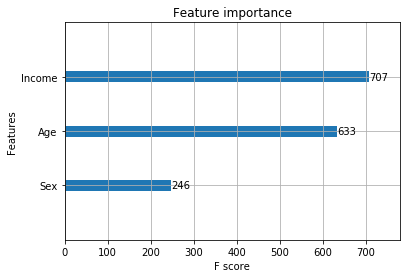

In [68]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x_XG, y, test_size=0.3, random_state=0)


from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
import xgboost as xgb


# fit model no training data
model_XG = XGBClassifier()
model_XG.fit(X_train,y_train)
plot_importance(model_XG)
pyplot.show()




In [69]:
model_XG.score(X_test,y_test)

0.6779220779220779

In [70]:
xTesting = df_noanswer[['Sex','Age','Income']]
model_XG.predict(xTesting)
df_noanswer['Sleep']=model_XG.predict(xTesting)
df_noanswer.head()

,Sex,Age,Income,Sleep
2,2,2,3,2
3,1,4,3,2
5,1,7,2,2
6,2,3,3,2
7,1,3,3,2


In [71]:
fin_df = pd.concat([df_withanswer,df_noanswer], axis=0)
fin_sorted=fin_df.sort_index()
fin_sorted.head(10)

,Sex,Age,Income,Sleep
0,1,3,3,2
1,1,6,4,2
2,2,2,3,2
3,1,4,3,2
4,2,3,4,3
5,1,7,2,2
6,2,3,3,2
7,1,3,3,2
8,1,6,2,2
9,1,6,2,2


In [72]:
del x_df['Sleep']

In [73]:
x_df['Sleep'] = fin_sorted['Sleep']
x_df.head()

,Sex,Age,Income,Type,Reason,Traffic,With,Cost,Sleep
0,1,3,3,relax,1.0,1.0,family,9,2
1,1,6,4,relax,2.0,2.0,family,10,2
2,2,2,3,relax,0.0,1.0,friends&couple,6,2
3,1,4,3,notsure,0.0,0.0,notsure,NaN,2
4,2,3,4,relax,4.0,1.0,friends&couple,6,3


<br>
<br>

### 2) Type 결측치처리
<hr>

In [74]:
df_type = x_df[['Type']]
df_type.head()

,Type
0,relax
1,relax
2,relax
3,notsure
4,relax


In [75]:
# 합치고 NaN으로 바꾸기

df = pd.concat([df_per,df_type], axis=1, sort=False)
df['Type'] = df['Type'].replace({'notsure': np.NaN})
df.head()

,Sex,Age,Income,Type
0,1,3,3,relax
1,1,6,4,relax
2,2,2,3,relax
3,1,4,3,NaN
4,2,3,4,relax


In [76]:
# 숫자로 replace 해주기 
# relax: 1, shop:2, exp: 3, watch: 4
df['Type'] = df['Type'].replace({'relax':1, 'shop':2, 'act':3, 'watch':4})
df.head()


,Sex,Age,Income,Type
0,1,3,3,1.0
1,1,6,4,1.0
2,2,2,3,1.0
3,1,4,3,NaN
4,2,3,4,1.0


In [77]:
df2=df.dropna(axis=0)
df2=df2.apply(pd.to_numeric)
df2=df2.astype(int)
y1=np.ravel(df2[['Type']],order='C')

df2.head()

,Sex,Age,Income,Type
0,1,3,3,1
1,1,6,4,1
2,2,2,3,1
4,2,3,4,1
6,2,3,3,1


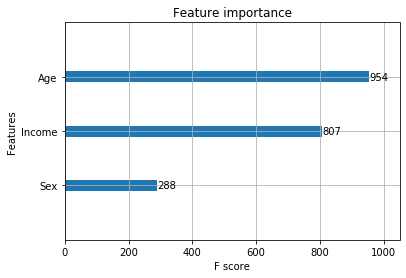

In [78]:
x_XG = df2[['Sex','Age','Income']]
y = df2['Type']

X_train, X_test, y_train, y_test = train_test_split( x_XG, y, test_size=0.3, random_state=0)


# fit model no training data
model_XG = XGBClassifier()
model_XG.fit(X_train,y_train)
plot_importance(model_XG)
pyplot.show()


In [79]:
noanswer = df['Type'].isnull() == True
df_noanswer = df[noanswer]

xTesting = df_noanswer[['Sex','Age','Income']]
model_XG.predict(xTesting)
df_noanswer['Type']=model_XG.predict(xTesting)
df_noanswer.head()

,Sex,Age,Income,Type
3,1,4,3,1
5,1,7,2,1
7,1,3,3,1
9,1,6,2,1
14,1,6,2,1


In [80]:
withanswer = df['Type'].isnull() == False
df_withanswer = df[withanswer]

fin_df = pd.concat([df_withanswer,df_noanswer], axis=0)
fin_sorted=fin_df.sort_index()
fin_sorted.head(10)

,Sex,Age,Income,Type
0,1,3,3,1.0
1,1,6,4,1.0
2,2,2,3,1.0
3,1,4,3,1.0
4,2,3,4,1.0
5,1,7,2,1.0
6,2,3,3,1.0
7,1,3,3,1.0
8,1,6,2,1.0
9,1,6,2,1.0


In [81]:
del x_df['Type']

In [82]:
x_df['Type'] = fin_sorted['Type']
x_df.head()

,Sex,Age,Income,Reason,Traffic,With,Cost,Sleep,Type
0,1,3,3,1.0,1.0,family,9,2,1.0
1,1,6,4,2.0,2.0,family,10,2,1.0
2,2,2,3,0.0,1.0,friends&couple,6,2,1.0
3,1,4,3,0.0,0.0,notsure,NaN,2,1.0
4,2,3,4,4.0,1.0,friends&couple,6,3,1.0


<br>
<br>

### 3) Traffic 결측치처리
<hr>

In [83]:
df_traf['Traffic'] = df_traf['Traffic'].replace({0.0: np.NaN})
df_traf.head()

,Traffic
0,1.0
1,2.0
2,1.0
3,NaN
4,1.0


In [84]:
# 합치고 NaN으로 바꾸기

df = pd.concat([df_per,df_traf], axis=1, sort=False)
df.head()

,Sex,Age,Income,Traffic
0,1,3,3,1.0
1,1,6,4,2.0
2,2,2,3,1.0
3,1,4,3,NaN
4,2,3,4,1.0


In [85]:
noanswer = df['Traffic'].isnull() == True
df_noanswer = df[noanswer]
df_noanswer.head()


,Sex,Age,Income,Traffic
3,1,4,3,NaN
5,1,7,2,NaN
7,1,3,3,NaN
9,1,6,2,NaN
14,1,6,2,NaN


In [86]:
withanswer = df['Traffic'].isnull() == False
df_withanswer = df[withanswer]
df_withanswer.head()

,Sex,Age,Income,Traffic
0,1,3,3,1.0
1,1,6,4,2.0
2,2,2,3,1.0
4,2,3,4,1.0
6,2,3,3,1.0


In [87]:
df2=df.dropna(axis=0)
df2=df2.apply(pd.to_numeric)
df2=df2.astype(int)
y1=np.ravel(df2[['Traffic']],order='C')

df2.head()

,Sex,Age,Income,Traffic
0,1,3,3,1
1,1,6,4,2
2,2,2,3,1
4,2,3,4,1
6,2,3,3,1


In [88]:
x_XG = df2[['Sex','Age','Income']]
y = df2['Traffic']

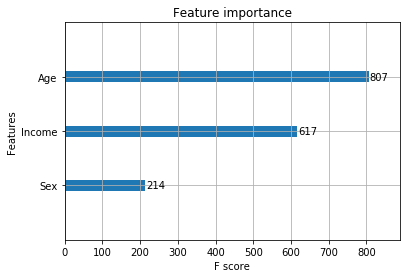

In [89]:
X_train, X_test, y_train, y_test = train_test_split( x_XG, y, test_size=0.3, random_state=0)

# fit model no training data
model_XG = XGBClassifier()
model_XG.fit(X_train,y_train)
plot_importance(model_XG)
pyplot.show()

In [90]:
model_XG.score(X_test,y_test)

0.7523584905660378

In [91]:
xTesting = df_noanswer[['Sex','Age','Income']]
model_XG.predict(xTesting)
df_noanswer['Traffic']=model_XG.predict(xTesting)
df_noanswer.head()

,Sex,Age,Income,Traffic
3,1,4,3,1
5,1,7,2,1
7,1,3,3,1
9,1,6,2,1
14,1,6,2,1


In [92]:
fin_df = pd.concat([df_withanswer,df_noanswer], axis=0)
fin_sorted=fin_df.sort_index()
fin_sorted.head(10)

,Sex,Age,Income,Traffic
0,1,3,3,1.0
1,1,6,4,2.0
2,2,2,3,1.0
3,1,4,3,1.0
4,2,3,4,1.0
5,1,7,2,1.0
6,2,3,3,1.0
7,1,3,3,1.0
8,1,6,2,2.0
9,1,6,2,1.0


In [93]:
del x_df['Traffic']

In [94]:
x_df['Traffic'] = fin_sorted['Traffic']
x_df.head()

,Sex,Age,Income,Reason,With,Cost,Sleep,Type,Traffic
0,1,3,3,1.0,family,9,2,1.0,1.0
1,1,6,4,2.0,family,10,2,1.0,2.0
2,2,2,3,0.0,friends&couple,6,2,1.0,1.0
3,1,4,3,0.0,notsure,NaN,2,1.0,1.0
4,2,3,4,4.0,friends&couple,6,3,1.0,1.0


<br>
<br>

### 4) With 결측치처리
<hr>

In [95]:
df_with.head()

,With
0,family
1,family
2,friends&couple
3,notsure
4,friends&couple


In [96]:
# 1: Fam 2: Co 3: etc #

df_with['With'] = df_with['With'].replace({'family':1,'friends&couple':2,'crew&etc':3})
df_with['With'] = df_with['With'].replace({'notsure': np.NaN})
df_with.head()

,With
0,1.0
1,1.0
2,2.0
3,NaN
4,2.0


In [97]:
df_per.head()

,Sex,Age,Income
0,1,3,3
1,1,6,4
2,2,2,3
3,1,4,3
4,2,3,4


In [98]:
df = pd.concat([df_per,df_with], axis=1, sort=False)
df.head()

,Sex,Age,Income,With
0,1,3,3,1.0
1,1,6,4,1.0
2,2,2,3,2.0
3,1,4,3,NaN
4,2,3,4,2.0


In [99]:
noanswer = df['With'].isnull() == True
df_noanswer = df[noanswer]
df_noanswer.head()

,Sex,Age,Income,With
3,1,4,3,NaN
5,1,7,2,NaN
7,1,3,3,NaN
9,1,6,2,NaN
14,1,6,2,NaN


In [100]:
withanswer = df['With'].isnull() == False
df_withanswer = df[withanswer]
df_withanswer.head()

,Sex,Age,Income,With
0,1,3,3,1.0
1,1,6,4,1.0
2,2,2,3,2.0
4,2,3,4,2.0
6,2,3,3,1.0


In [101]:
df2=df.dropna(axis=0)
df2=df2.apply(pd.to_numeric)
df2=df2.astype(int)
y1=np.ravel(df2[['With']],order='C')

df2.head()

,Sex,Age,Income,With
0,1,3,3,1
1,1,6,4,1
2,2,2,3,2
4,2,3,4,2
6,2,3,3,1


In [102]:
x_XG = df2[['Sex','Age','Income']]
y = df2['With']

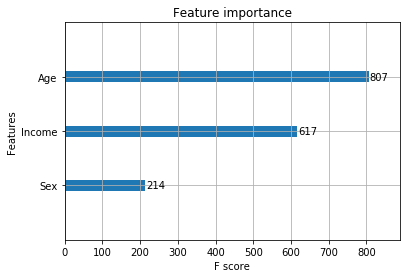

In [103]:
# fit model no training data

model_XG = XGBClassifier()
model_XG.fit(X_train,y_train)
plot_importance(model_XG)
pyplot.show()

In [104]:
model_XG.score(X_test,y_test)

0.7523584905660378

In [105]:
xTesting = df_noanswer[['Sex','Age','Income']]
model_XG.predict(xTesting)
df_noanswer['With']=model_XG.predict(xTesting)
df_noanswer.head()

,Sex,Age,Income,With
3,1,4,3,1
5,1,7,2,1
7,1,3,3,1
9,1,6,2,1
14,1,6,2,1


In [106]:
fin_df = pd.concat([df_withanswer,df_noanswer], axis=0)
fin_sorted=fin_df.sort_index()
fin_sorted.head(10)

,Sex,Age,Income,With
0,1,3,3,1.0
1,1,6,4,1.0
2,2,2,3,2.0
3,1,4,3,1.0
4,2,3,4,2.0
5,1,7,2,1.0
6,2,3,3,1.0
7,1,3,3,1.0
8,1,6,2,3.0
9,1,6,2,1.0


In [107]:
del x_df['With']

x_df['With'] = fin_sorted['With']
x_df.head()

,Sex,Age,Income,Reason,Cost,Sleep,Type,Traffic,With
0,1,3,3,1.0,9,2,1.0,1.0,1.0
1,1,6,4,2.0,10,2,1.0,2.0,1.0
2,2,2,3,0.0,6,2,1.0,1.0,2.0
3,1,4,3,0.0,NaN,2,1.0,1.0,1.0
4,2,3,4,4.0,6,3,1.0,1.0,2.0


<br>
<br>

### 5) Reason 결측치처리
<hr>

In [108]:
df_reason = x_df['Reason']
df = pd.concat([df_per,df_reason], axis=1, sort=False)
df.head()

,Sex,Age,Income,Reason
0,1,3,3,1.0
1,1,6,4,2.0
2,2,2,3,0.0
3,1,4,3,0.0
4,2,3,4,4.0


In [109]:
df['Reason'] = df['Reason'].replace({0.0: np.NaN})
df.head()

,Sex,Age,Income,Reason
0,1,3,3,1.0
1,1,6,4,2.0
2,2,2,3,NaN
3,1,4,3,NaN
4,2,3,4,4.0


In [110]:
noanswer = df['Reason'].isnull() == True
df_noanswer = df[noanswer]
withanswer = df['Reason'].isnull() == False
df_withanswer = df[withanswer]
df2=df.dropna(axis=0)
df2=df2.apply(pd.to_numeric)
df2=df2.astype(int)
y1=np.ravel(df2[['Reason']],order='C')

In [111]:
x_XG = df2[['Sex', 'Age', 'Income']]
y = df2['Reason']

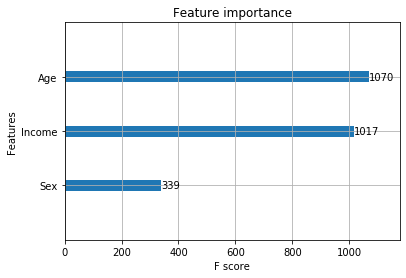

In [112]:
X_train, X_test, y_train, y_test = train_test_split( x_XG, y, test_size=0.3, random_state=0)
model_XG = XGBClassifier()
model_XG.fit(X_train,y_train)
plot_importance(model_XG)
pyplot.show()

In [113]:
xTesting = df_noanswer[['Sex','Age','Income']]
model_XG.predict(xTesting)
df_noanswer['Reason']=model_XG.predict(xTesting)
df_noanswer.head()

,Sex,Age,Income,Reason
2,2,2,3,2
3,1,4,3,2
5,1,7,2,1
7,1,3,3,1
9,1,6,2,2


In [114]:
fin_df = pd.concat([df_withanswer,df_noanswer], axis=0)
fin_sorted=fin_df.sort_index()
fin_sorted.head(10)

,Sex,Age,Income,Reason
0,1,3,3,1.0
1,1,6,4,2.0
2,2,2,3,2.0
3,1,4,3,2.0
4,2,3,4,4.0
5,1,7,2,1.0
6,2,3,3,1.0
7,1,3,3,1.0
8,1,6,2,2.0
9,1,6,2,2.0


In [115]:
del x_df['Reason']

x_df['With'] = fin_sorted['Reason']
x_df.head()

,Sex,Age,Income,Cost,Sleep,Type,Traffic,With
0,1,3,3,9,2,1.0,1.0,1.0
1,1,6,4,10,2,1.0,2.0,2.0
2,2,2,3,6,2,1.0,1.0,2.0
3,1,4,3,NaN,2,1.0,1.0,2.0
4,2,3,4,6,3,1.0,1.0,4.0


<br>
<br>

### 6) Cost 결측치처리
<hr>

In [116]:
del df_cost['1인지출비용']

df_cost.head()

,Cost
0,9
1,10
2,6
3,NaN
4,6


In [117]:
df_per.head()

,Sex,Age,Income
0,1,3,3
1,1,6,4
2,2,2,3
3,1,4,3
4,2,3,4


In [118]:
df = pd.concat([df_per,df_cost], axis=1, sort=False)
df.head()

,Sex,Age,Income,Cost
0,1,3,3,9
1,1,6,4,10
2,2,2,3,6
3,1,4,3,NaN
4,2,3,4,6


In [119]:
noanswer = df['Cost'].isnull() == True
df_noanswer = df[noanswer]
df_noanswer.head()

,Sex,Age,Income,Cost
3,1,4,3,NaN
5,1,7,2,NaN
7,1,3,3,NaN
9,1,6,2,NaN
14,1,6,2,NaN


In [120]:
withanswer = df['Cost'].isnull() == False
df_withanswer = df[withanswer]
df_withanswer.head()

,Sex,Age,Income,Cost
0,1,3,3,9
1,1,6,4,10
2,2,2,3,6
4,2,3,4,6
6,2,3,3,2


In [121]:
df2=df.dropna(axis=0)
df2=df2.apply(pd.to_numeric)
df2=df2.astype(int)
y1=np.ravel(df2[['Cost']],order='C')

df2.head()

,Sex,Age,Income,Cost
0,1,3,3,9
1,1,6,4,10
2,2,2,3,6
4,2,3,4,6
6,2,3,3,2


In [122]:
x_XG = df2[['Sex', 'Age', 'Income']]
y = df2['Cost']

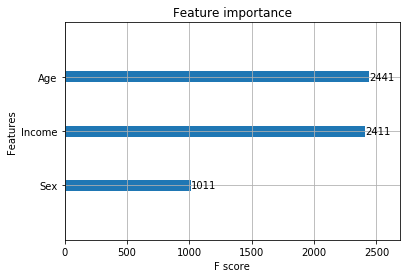

In [123]:
X_train, X_test, y_train, y_test = train_test_split( x_XG, y, test_size=0.3, random_state=0)

# fit model no training data
model_XG = XGBClassifier()
model_XG.fit(X_train,y_train)
plot_importance(model_XG)
pyplot.show()

In [124]:
model_XG.score(X_test,y_test)

0.14976415094339623

In [125]:
xTesting = df_noanswer[['Sex','Age','Income']]
model_XG.predict(xTesting)
df_noanswer['Cost']=model_XG.predict(xTesting)
df_noanswer.head()

,Sex,Age,Income,Cost
3,1,4,3,2
5,1,7,2,1
7,1,3,3,8
9,1,6,2,2
14,1,6,2,2


In [126]:
fin_df = pd.concat([df_withanswer,df_noanswer], axis=0)
fin_sorted=fin_df.sort_index()
fin_sorted.head(10)

,Sex,Age,Income,Cost
0,1,3,3,9
1,1,6,4,10
2,2,2,3,6
3,1,4,3,2
4,2,3,4,6
5,1,7,2,1
6,2,3,3,2
7,1,3,3,8
8,1,6,2,1
9,1,6,2,2


In [127]:
del x_df['Cost']

x_df['Cost'] = fin_sorted['Cost']
x_df.head()

,Sex,Age,Income,Sleep,Type,Traffic,With,Cost
0,1,3,3,2,1.0,1.0,1.0,9
1,1,6,4,2,1.0,2.0,2.0,10
2,2,2,3,2,1.0,1.0,2.0,6
3,1,4,3,2,1.0,1.0,2.0,2
4,2,3,4,3,1.0,1.0,4.0,6
